# Solve classification priblem with Logistic Regresion Model 

 Import Required Liberaries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

Import dataset(Downloaded from keggle "Titanic_csv")

In [3]:
df=pd.read_csv('train.csv')

In [4]:
# print first 5 rows & size of dataset 
print([df.head()])
df.shape

[   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  ]


(891, 12)

In [5]:
#display all rows present dataset
pd.set_option('display.max_rows', 100)

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
# Basic statical overview of data set
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#information of dataset about null value present and types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# find out all the columns with null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

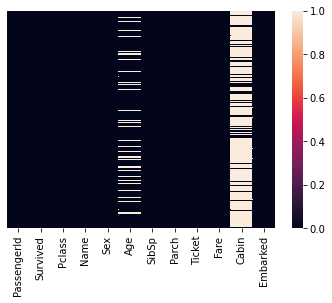

In [10]:
# A visuaization to predicit all null values presnet in dataframe
sns.heatmap(df.isnull(), yticklabels=False)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Missing values Imputation

In [12]:
#df['Age'].fillna(df['Age'].median(), inplace = True)

In [13]:
# imputation of missing values present Age variables w.r.t 'pclass' variable 
frames = []
for i in list(set(df['Pclass'])):
    df_Pclass = df[df['Pclass']== 1]
    df_Pclass['Age'].fillna(df_Pclass['Age'].median(),inplace = True)
    frames.append(df_Pclass)
    df = pd.concat(frames)

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [14]:
# drop whole cabin column because having too much null values
df.drop(["Cabin"], axis=1, inplace = True)

In [15]:
#cross check that imputation is worked properly or not
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       8
dtype: int64

In [16]:
#drop the rows remaining with null values 
df.dropna(axis=0, inplace= True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
# check shape of dataframe after remidation of missing value
df.shape

(856, 11)

# convert  categorical variables into numerical variables (Dummy_variables)  

In [19]:
#creat dummy variables of sex variables present in data frame 
sex_dum=pd.get_dummies(df['Sex'],drop_first=True)
print(sex_dum)

     male
1       0
3       0
6       1
11      0
23      1
..    ...
871     0
872     1
879     0
887     0
889     1

[856 rows x 1 columns]


In [20]:
#creat dummy variables of 'Embarked' variables present in data frame
embarked_dum=pd.get_dummies(df['Embarked'], drop_first=True)
print(embarked_dum)

     Q  S
1    0  0
3    0  1
6    0  1
11   0  1
23   0  1
..  .. ..
871  0  1
872  0  1
879  0  0
887  0  1
889  0  0

[856 rows x 2 columns]


In [21]:
# select all categorical variables 
cat_var=df.select_dtypes(include=object)

In [22]:
# drop categorical variables
df=df.drop(cat_var, axis= 1)

In [23]:
# concate(joint) dummy variables with  dataframe 
df=pd.concat([df,sex_dum,embarked_dum], axis=1)

In [24]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1
6,7,0,1,54.0,0,0,51.8625,1,0,1
11,12,1,1,58.0,0,0,26.5500,0,0,1
23,24,1,1,28.0,0,0,35.5000,1,0,1
...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542,0,0,1
872,873,0,1,33.0,0,0,5.0000,1,0,1
879,880,1,1,56.0,0,1,83.1583,0,0,0
887,888,1,1,19.0,0,0,30.0000,0,0,1


In [25]:
df.isnull().sum().sum() 

0

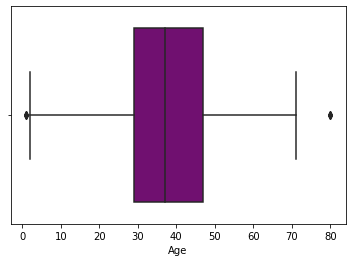

In [26]:
# creat a box plot to detect outliers present in age 
sns.boxplot(x='Age', data= df, color="purple")
plt.show()

In [27]:
# find inter quartile range for age
IQR= df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
IQR

18.0

In [28]:
#print upper limit and lower limit
lower_Age= df['Age'].quantile(0.25)-(IQR*1.5)
upper_Age= df['Age'].quantile(0.75)+(IQR*1.5)
print(lower_Age), print(upper_Age)

2.0
74.0


(None, None)

In [ ]:
# clear outliers of Age
df.loc[df['Age']>=upper_Age,'Age']=upper_Age


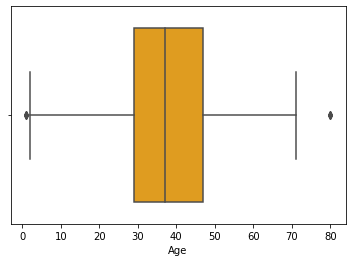

In [29]:
# crosscheck outliers clearance in Age
sns.boxplot(x='Age', data= df, color='orange')
plt.show()

Same process is used for the outliers remidation is used for 'Fare' 

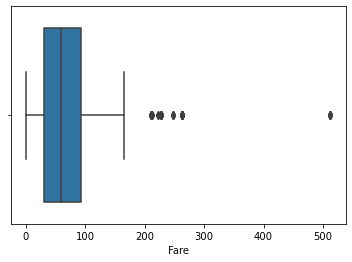

In [30]:

sns.boxplot(x='Fare', data= df)
plt.show()

In [31]:
IQR= df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)
IQR

62.8042

In [32]:
lower_bridge= df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge= df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-63.5105
187.7063


(None, None)

In [95]:
df.loc[df['Fare']>=upper_bridge,'Fare']=upper_bridge

# split dataset inti traning and testing dataset

In [96]:
#import train_test_slpit model
from sklearn.model_selection import train_test_split

In [97]:
# sepreat independent variables  and target class 
x=df.drop(["Survived",'PassengerId'], axis=1)
y=df["Survived"]

In [126]:
# split dataset into traimg and testing dataset
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.35, random_state=1010)

In [127]:

print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(556, 8)
(300, 8)
(556,)
(300,)


#  Random Forest Classification  model implimentation

In [128]:
# Import Random Forest Classification model
from sklearn.ensemble import RandomForestClassifier 

In [129]:
RFC=RandomForestClassifier( n_estimators=51,criterion='gini',)

In [130]:
# fit the model on trainig dataset
RFC.fit(X_train,y_train)

RandomForestClassifier(n_estimators=51)

In [131]:
RFC.score(X_test, y_test)

0.9733333333333334

In [132]:
# prediction on test dataset 
y_pred=RFC.predict(X_test)

# cross Validation

In [133]:
# import metrics
from sklearn import metrics

In [134]:
#cross validation bty creating confusion matrics
confu_metrics=pd.crosstab(y_test,y_pred,  rownames=['Actual'], colnames=['Predicted'])
confu_metrics

Predicted,0,1
Actual,,
0,115,6
1,2,177


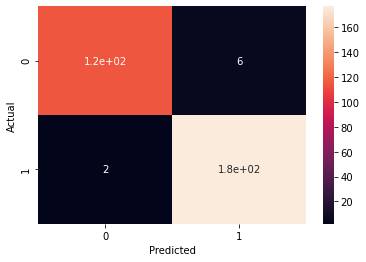

In [135]:
# visualiztion of confusion metrics
sns.heatmap(confu_metrics, annot=True,)
plt.show()

In [136]:
# Import Classification Report
from sklearn.metrics import classification_report

In [137]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       121
           1       0.97      0.99      0.98       179

    accuracy                           0.97       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [138]:
Pessanger1=X_test.iloc[-155, :].values

In [139]:
Pessanger1=[Pessanger1]
Pessanger1

[array([ 1.  , 62.  ,  0.  ,  0.  , 26.55,  1.  ,  0.  ,  1.  ])]

In [140]:
Pessanger1_pred=RFC.predict(Pessanger1)

In [141]:
Pessanger1_pred

array([0], dtype=int64)

In [142]:
if Pessanger1_pred[0]== 0:
    print('Pessanger is  not survived, Sorry For Your Lose')
else:
    print('Pessanger is survived, Lucky Person :)')

Pessanger is  not survived, Sorry For Your Lose


In [143]:
y_test.iloc[-155]

0